
# Shreeya Pahune
<p>2018113011

# Tutorial-2 

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes: 
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: we will learn its usage.

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Grid schemes
Typically used for 1/2 dimensional integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

# Task-1
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle

In [5]:
def Plot1():
    X=np.array([])
    Y=np.array([])
    X=np.arange(10000, 100000, 1000)
    for i in X:
        Y=np.append(Y, (abs(Def_Int_1D(lambda y: np.sqrt(1-y*y)*2, -1, 1, N=i)-np.pi)/np.pi))
    plt.plot(X,Y)
    plt.title('Accuracy of Riemann Integral')
    plt.xlabel('Number of Steps')
    plt.ylabel('Amount of Error')
    plt.show()

def Def_Int_1D(f, a, b, N):
    h = (b-a)/N
    area=0
    x=a
    for i in range (1, N):
        area += f(x)*h
        x=x+h
    return area
    


3.1415813278307865


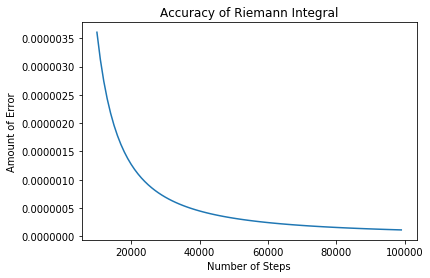

In [6]:
print(Def_Int_1D(lambda y: np.sqrt(1-y*y)*2 , -1, 1, 10000))
Plot1()

# Task-2
Exploratory task: Adaptive grid size. When the function changes 'too fast', then more grid points; compute area using trapizoidal rule



/home/shreeya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/home/shreeya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


nan


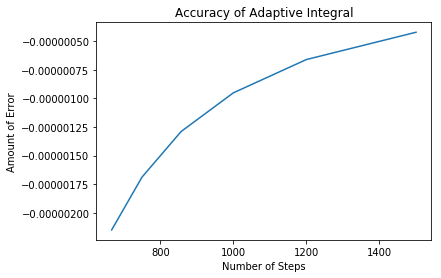

In [7]:
#Suggested Method:  use https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/

def AdaptGrid(fn, a, b, dy=0.001):
    diff = lambda f, x, dx = 0.000001: 1 + abs((f(x+dx) - f(x)))/dx
    area=0
    x=a
    count = 0
    dx = dy / diff(fn, x)
    while x < b:
        dx = dy / diff(fn, x)
        area += fn(x) * dx
        x += dx
        count += 1
    return area, count


value, steps = AdaptGrid(lambda y: np.sqrt(1 - y*y)*2, -1, 1)
print(value)

value, steps = np.array([]), np.array([])
for dy in np.arange(0.001, 0.0100, 0.001):
    area, count = AdaptGrid(lambda y: np.sqrt(1 - y*y)*2, -1, 1, dy)
    value, steps = np.append(value, area), np.append(steps, count)
    
plt.plot(steps, (np.pi - value)/np.pi)
plt.title('Accuracy of Adaptive Integral')
plt.xlabel('Number of Steps')
plt.ylabel('Amount of Error')
plt.show()


3.1415926164614776


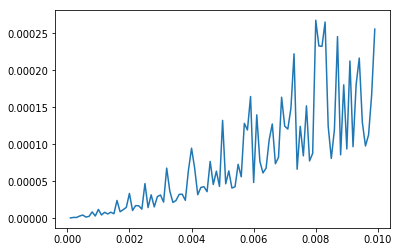

In [125]:
# My attempt for adaptive grid:

def Plot2():
    X=np.array([])
    Y=np.array([])
    X=np.arange(0.0001, 0.01000, 0.0001)
    for i in X:
        Y=np.append(Y, (abs(Def_Int_1Db(lambda y: np.sqrt(1-y*y)*2, -1, 1, h=i)-np.pi)/np.pi))
    plt.plot(X,Y)
    plt.show()


def Def_Int_1Db(f, a, b, h):
    h0=h
    area=0
    x=a
    arr=np.array([])
    while(x+h<b):
        h=h0
        if(abs(f(x+h)-f(x)/h) < 1 and abs(f(x+h)-f(x)/h!=0)):
            while (abs(f(x+h)-f(x))/h < 1  and abs(f(x+h)-f(x))/h!=0):
                h+=0.001
        x=x+h
        area += f(x)*h
    return area

print(Def_Int_1Db(lambda y: np.sqrt(abs(1-y*y))*2, -1, 1, 0.00001))

Plot2()

# Task-3
Monte Carlo methods are typically used when we have very large dimensional integrals.

Compute the area of the quarter unit circle (1st quadrant) using Monte Carlo method

In [8]:
def MC_Inta():
    nc=0
    ns=0
    a=np.array([])
    a=np.random.uniform(0, 1, 100000)
    arr=np.array([])
    for i in range(99999):
        if (a[i]*a[i] + a[i+1]*a[i+1] < 1):
            nc=nc+1
        ns=ns+1
        arr=np.append(arr,(((nc/ns)*4-np.pi)/np.pi))
    area=0
    area = nc/ns
    print(area*4)
    MC_plot(arr)

def MC_plot(arr):
    plt.plot(range(arr.size), arr)
    plt.title('Accuracy of MonteCarlo Integral')
    plt.xlabel('Number of Steps')
    plt.ylabel('Amount of Error')
    plt.show()

3.142111421114211


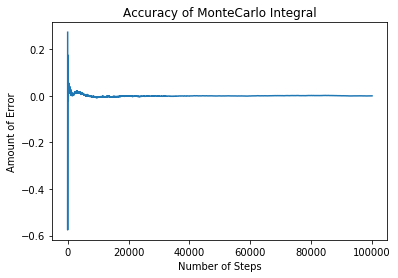

In [9]:
MC_Inta()

In [11]:
def MC_Intb(f):
    a=np.array(np.random.uniform(-2, 2, 100000))
    s=0
    arr=np.array([])
    for i in a:
        if (i>1 or i<-1):
            s += 0
        else:
            s += f(i)
    s=float(s)/100000
    print(s*4)

In [12]:
MC_Intb(lambda y: np.sqrt(abs(1-y*y))*2)

3.1374099909755455


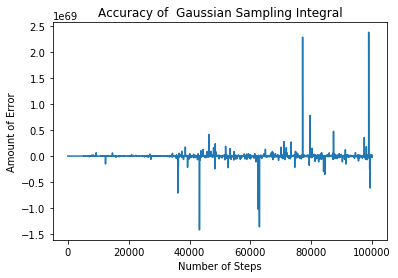

1.568010001115514e+60


In [28]:
def MC_Intc(f, a, b, N=100000):
    a=np.random.normal(0.0, 2.0, N)
    s=0
    arr=np.array([])
    for i in a:
        s += f(i)/(np.exp(-(i*i)/2*2.00*2.00)/2.00*np.sqrt(2*np.pi))
        arr = np.append(arr, 2*s/i)
    plt.plot(np.pi-arr) 
    plt.title('Accuracy of  Gaussian Sampling Integral')
    plt.xlabel('Number of Steps')
    plt.ylabel('Amount of Error')
    plt.show()
    print(s/N)
    
MC_Intc(lambda y: np.sqrt(abs(1-y*y))*2, -1, 1)